In [1]:
import numpy as np

# Add models here
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# Sklearn imports for processing and evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Plotting
from matplotlib import pyplot as plt

# Misc
import time
from tqdm import tqdm

## Baseline Results

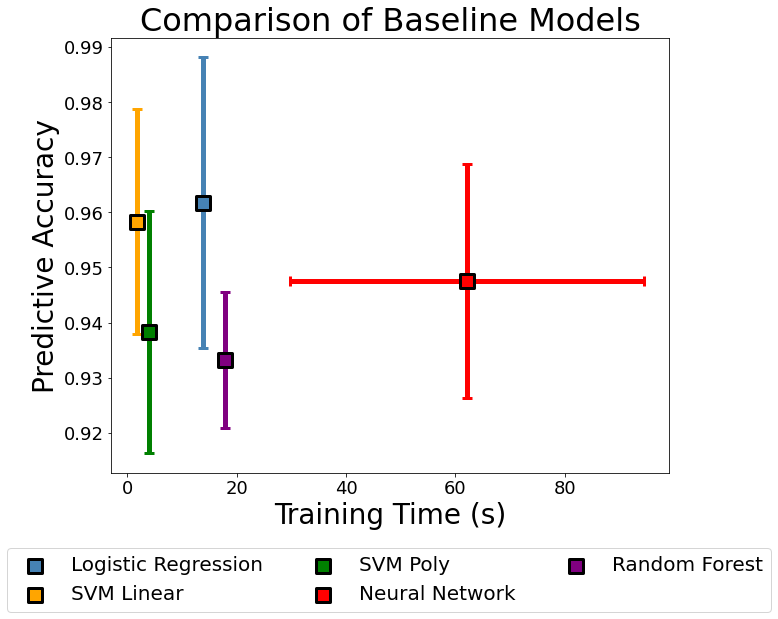

In [2]:
lr_baseline = np.load("/content/drive/MyDrive/uci_har_dataset/results/lr_score.npy")
lr_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/lr_time.npy")
mean_lr_acc = np.mean(lr_baseline, axis=0)
std_lr_acc = np.std(lr_baseline, axis=0)
mean_lr_time = np.mean(lr_time, axis=0)
std_lr_time = np.std(lr_time, axis=0)

lin_baseline = np.load("/content/drive/MyDrive/uci_har_dataset/results/lin_score.npy")
lin_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/lin_time.npy")
mean_lin_acc = np.mean(lin_baseline, axis=0)
std_lin_acc = np.std(lin_baseline, axis=0)
mean_lin_time = np.mean(lin_time, axis=0)
std_lin_time = np.std(lin_time, axis=0)

poly_baseline = np.load("/content/drive/MyDrive/uci_har_dataset/results/poly_score.npy")
poly_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/poly_time.npy")
mean_poly_acc = np.mean(poly_baseline, axis=0)
std_poly_acc = np.std(poly_baseline, axis=0)
mean_poly_time = np.mean(poly_time, axis=0)
std_poly_time = np.std(poly_time, axis=0)

nn_baseline = np.load("/content/drive/MyDrive/uci_har_dataset/results/nn_score.npy")
nn_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/nn_time.npy")
mean_nn_acc = np.mean(nn_baseline, axis=0)
std_nn_acc = np.std(nn_baseline, axis=0)
mean_nn_time = np.mean(nn_time, axis=0)
std_nn_time = np.std(nn_time, axis=0)

rf_baseline = np.load("/content/drive/MyDrive/uci_har_dataset/results/rf_score.npy")
rf_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/rf_time.npy")
mean_rf_acc = np.mean(rf_baseline, axis=0)
std_rf_acc = np.std(rf_baseline, axis=0)
mean_rf_time = np.mean(rf_time, axis=0)
std_rf_time = np.std(rf_time, axis=0)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(mean_lr_time, mean_lr_acc, s=200, edgecolors='k', linewidth=3, marker='s', color='steelblue', label="Logistic Regression")
ax.errorbar(mean_lr_time, mean_lr_acc, xerr=std_lr_time, yerr=std_lr_acc, capsize=5, color='steelblue', lw=5, zorder=0, capthick=3)

ax.scatter(mean_lin_time, mean_lin_acc, s=200, edgecolors='k', linewidth=3, marker='s', color='orange', label="SVM Linear")
ax.errorbar(mean_lin_time, mean_lin_acc, xerr=std_lin_time, yerr=std_lin_acc, capsize=5, color='orange', lw=5, zorder=0, capthick=3)

ax.scatter(mean_poly_time, mean_poly_acc, s=200, edgecolors='k', linewidth=3, marker='s', color='green', label="SVM Poly")
ax.errorbar(mean_poly_time, mean_poly_acc, xerr=std_poly_time, yerr=std_poly_acc, capsize=5, color='green', lw=5, zorder=0, capthick=3)

ax.scatter(mean_nn_time, mean_nn_acc, s=200, edgecolors='k', linewidth=3, marker='s', color='red', label="Neural Network")
ax.errorbar(mean_nn_time, mean_nn_acc, xerr=std_nn_time, yerr=std_nn_acc, capsize=5, color='red', lw=5, zorder=0, capthick=3)

ax.scatter(mean_rf_time, mean_rf_acc, s=200, edgecolors='k', linewidth=3, marker='s', color='purple', label="Random Forest")
ax.errorbar(mean_rf_time, mean_rf_acc, xerr=std_rf_time, yerr=std_rf_acc, capsize=5, color='purple', lw=5, zorder=0, capthick=3)

ax.set_title("Comparison of Baseline Models", fontsize=32)
ax.set_xlabel("Training Time (s)", fontsize=28)
ax.set_ylabel("Predictive Accuracy", fontsize=28)

ax.set_xticks([i for i in range(0, 100, 20)])
ax.set_xticklabels([str(i) for i in range(0, 100, 20)], fontsize=18)

ax.set_yticks([i for i in np.arange(0.92, 1.0, 0.01)])
ax.set_yticklabels(["{0:.2f}".format(i) for i in np.arange(0.92, 1.0, 0.01)], fontsize=18)
ax.legend(bbox_to_anchor=(1.5, 1.0), fontsize=20)
ax.legend(bbox_to_anchor=(1.2, -0.15), fontsize=20, ncol=3)
plt.show()

## Subsampling with/without PCA/MI

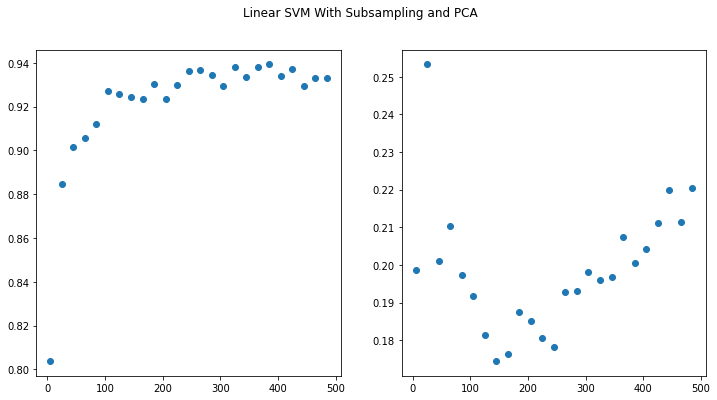

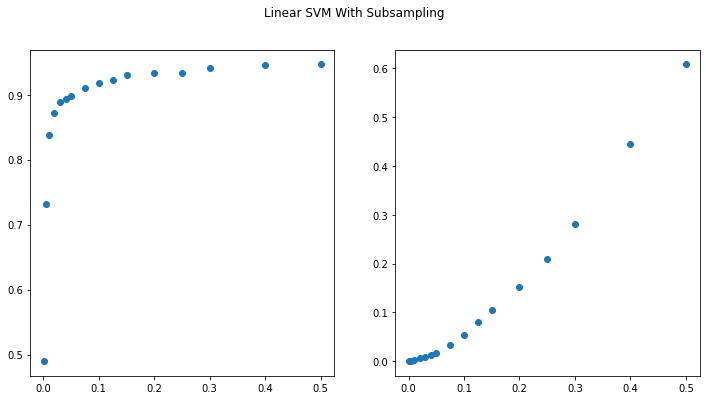

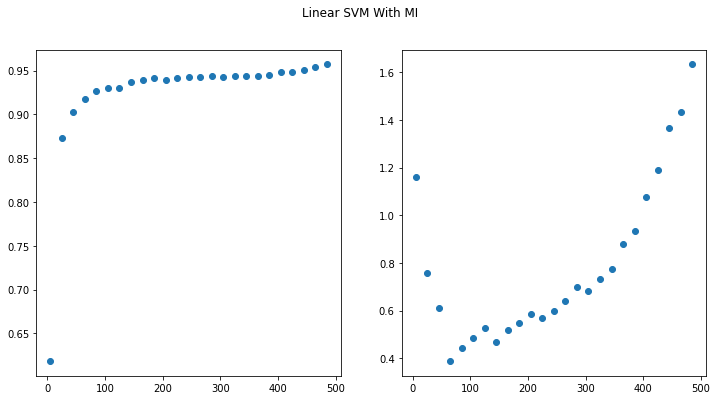

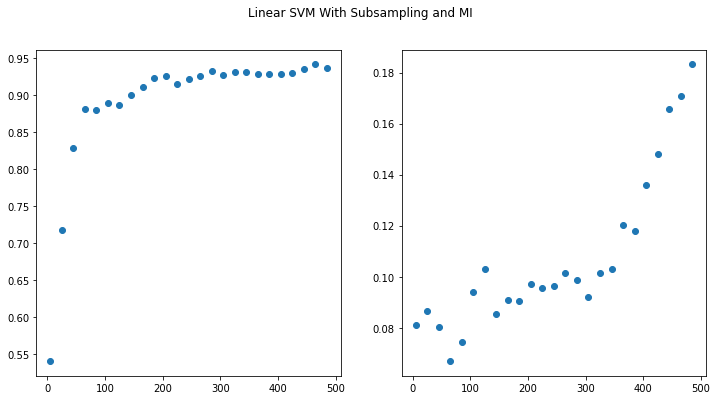

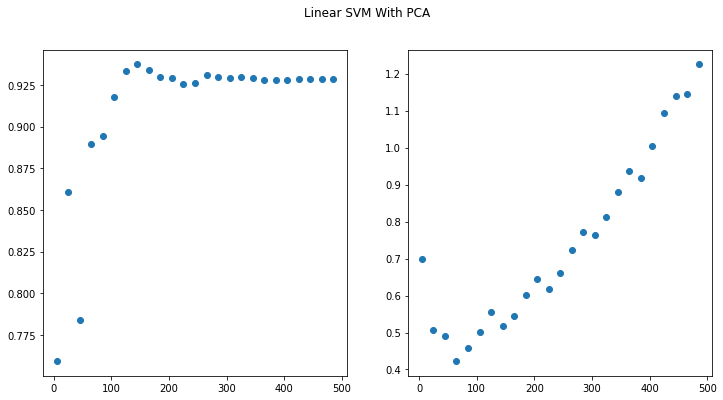

In [27]:
svm_sub_pca_acc = np.load("/content/drive/MyDrive/uci_har_dataset/results/svm_sub_pca_linear_accuracy.npy")
svm_sub_pca_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/svm_sub_pca_linear_time.npy")

mean_svm_sub_pca_acc = np.mean(svm_sub_pca_acc, axis=1)
std_svm_sub_pca_acc = np.std(svm_sub_pca_acc, axis=1)
mean_svm_sub_pca_time = np.mean(svm_sub_pca_time, axis=1)
std_svm_sub_pca_time = np.std(svm_sub_pca_time, axis=1)

svm_sub_acc = np.load("/content/drive/MyDrive/uci_har_dataset/results/svm_sub_linear_accuracy.npy")
svm_sub_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/svm_sub_linear_time.npy")

mean_svm_sub_acc = np.mean(svm_sub_acc, axis=1)
std_svm_sub_acc = np.std(svm_sub_acc, axis=1)
mean_svm_sub_time = np.mean(svm_sub_time, axis=1)
std_svm_sub_time = np.std(svm_sub_time, axis=1)

svm_mi_acc = np.load("/content/drive/MyDrive/uci_har_dataset/results/lin_mi_score.npy")
svm_mi_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/lin_mi_time.npy")

mean_svm_mi_acc = np.mean(svm_mi_acc, axis=1)
std_svm_mi_acc = np.std(svm_mi_acc, axis=1)
mean_svm_mi_time = np.mean(svm_mi_time, axis=1)
std_svm_mi_time = np.std(svm_mi_time, axis=1)

num_features_mi = np.arange(5, 250, 20)


svm_sub_mi_acc = np.load("/content/drive/MyDrive/uci_har_dataset/results/svm_sub_mi_linear_accuracy.npy")
svm_sub_mi_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/svm_sub_mi_linear_time.npy")

mean_svm_sub_mi_acc = np.mean(svm_sub_mi_acc, axis=1)
std_svm_sub_mi_acc = np.std(svm_sub_mi_acc, axis=1)
mean_svm_sub_mi_time = np.mean(svm_sub_mi_time, axis=1)
std_svm_sub_mi_time = np.std(svm_sub_mi_time, axis=1)

svm_pca_acc = np.load("/content/drive/MyDrive/uci_har_dataset/results/lin_pca_score.npy")
svm_pca_time = np.load("/content/drive/MyDrive/uci_har_dataset/results/lin_pca_time.npy")

mean_svm_pca_acc = np.mean(svm_pca_acc, axis=1)
std_svm_pca_acc = np.std(svm_pca_acc, axis=1)
mean_svm_pca_time = np.mean(svm_pca_time, axis=1)
std_svm_pca_time = np.std(svm_pca_time, axis=1)

num_features = np.arange(5, 500, 20)
best_sub_pca_idx = np.argwhere(num_features == 185)[0][0]

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With Subsampling and PCA")
ax[0].scatter(num_features, mean_svm_sub_pca_acc)
ax[1].scatter(num_features, mean_svm_sub_pca_time)
plt.show()

num_points = np.array([0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5])
best_sub_idx = np.argwhere(num_points == 0.25)[0][0]

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With Subsampling")
ax[0].scatter(num_points, mean_svm_sub_acc)
ax[1].scatter(num_points, mean_svm_sub_time)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With MI")
ax[0].scatter(num_features, mean_svm_mi_acc)
ax[1].scatter(num_features, mean_svm_mi_time)
#ax[0].scatter(num_features_mi, mean_svm_mi_acc)
#ax[1].scatter(num_features_mi, mean_svm_mi_time)
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With Subsampling and MI")
ax[0].scatter(num_features, mean_svm_sub_mi_acc)
ax[1].scatter(num_features, mean_svm_sub_mi_time)
plt.show()

num_features = np.arange(5, 500, 20)
best_pca_idx = np.argwhere(num_features == 145)[0][0]

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With PCA")
ax[0].scatter(num_features, mean_svm_pca_acc)
ax[1].scatter(num_features, mean_svm_pca_time)
plt.show()


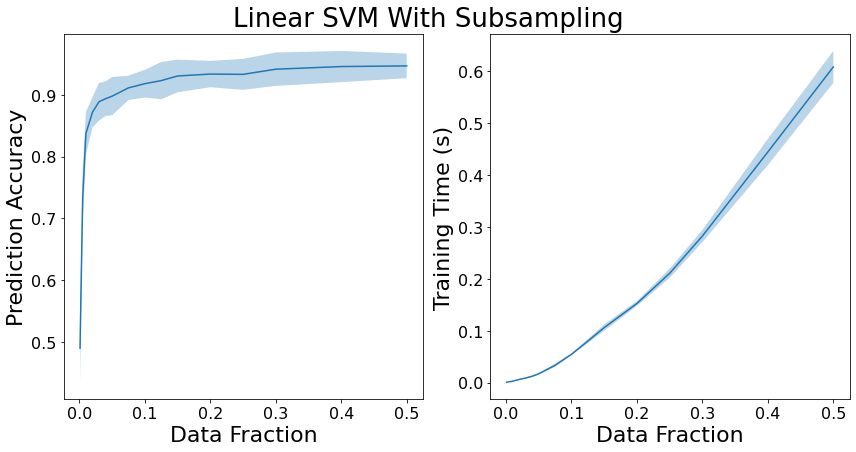

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With Subsampling", fontsize=26, y=1.04)
ax[0].plot(num_points, mean_svm_sub_acc)
ax[0].fill_between(num_points, mean_svm_sub_acc+std_svm_sub_acc, mean_svm_sub_acc-std_svm_sub_acc, alpha=0.3)
ax[1].plot(num_points, mean_svm_sub_time)
ax[1].fill_between(num_points, mean_svm_sub_time+std_svm_sub_time, mean_svm_sub_time-std_svm_sub_time, alpha=0.3)

ax[0].set_xlabel("Data Fraction", fontsize=22)
ax[0].set_ylabel("Prediction Accuracy", fontsize=22)

ax[1].set_xlabel("Data Fraction", fontsize=22)
ax[1].set_ylabel("Training Time (s)", fontsize=22)

ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

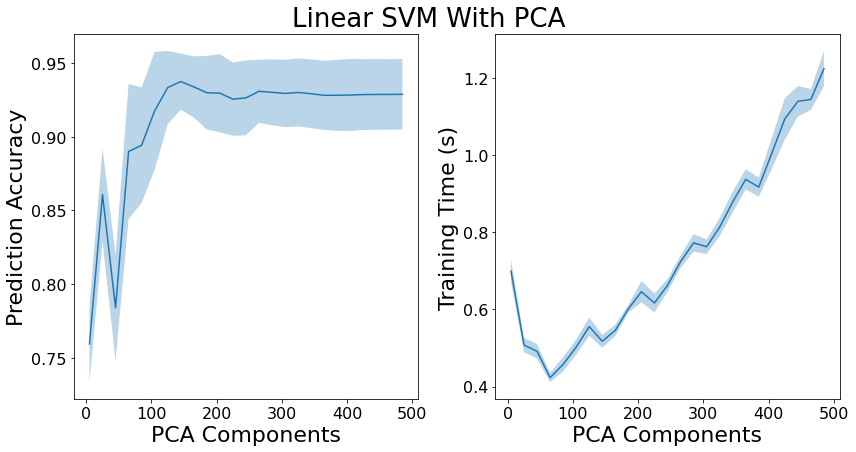

In [55]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].plot(num_features, mean_svm_pca_acc)
ax[0].fill_between(num_features, mean_svm_pca_acc+std_svm_pca_acc, mean_svm_pca_acc-std_svm_pca_acc, alpha=0.3)

ax[1].plot(num_features, mean_svm_pca_time)
ax[1].fill_between(num_features, mean_svm_pca_time+std_svm_pca_time, mean_svm_pca_time-std_svm_pca_time, alpha=0.3)

fig.suptitle("Linear SVM With PCA", fontsize=26, y=1.04)
ax[0].set_xlabel("PCA Components", fontsize=22)
ax[0].set_ylabel("Prediction Accuracy", fontsize=22)

ax[1].set_xlabel("PCA Components", fontsize=22)
ax[1].set_ylabel("Training Time (s)", fontsize=22)

ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.show()

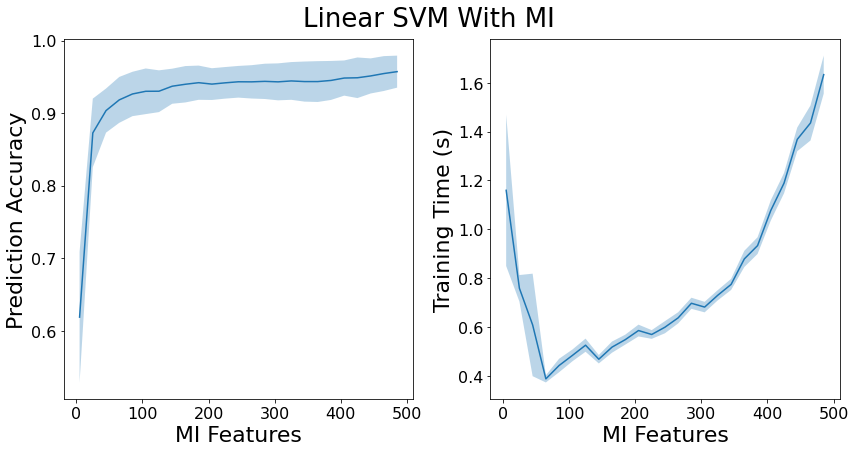

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].plot(num_features, mean_svm_mi_acc)
ax[0].fill_between(num_features, mean_svm_mi_acc+std_svm_mi_acc, mean_svm_mi_acc-std_svm_mi_acc, alpha=0.3)

ax[1].plot(num_features, mean_svm_mi_time)
ax[1].fill_between(num_features, mean_svm_mi_time+std_svm_mi_time, mean_svm_mi_time-std_svm_mi_time, alpha=0.3)

fig.suptitle("Linear SVM With MI", fontsize=26, y=1.04)
ax[0].set_xlabel("MI Features", fontsize=22)
ax[0].set_ylabel("Prediction Accuracy", fontsize=22)

ax[1].set_xlabel("MI Features", fontsize=22)
ax[1].set_ylabel("Training Time (s)", fontsize=22)

ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.show()

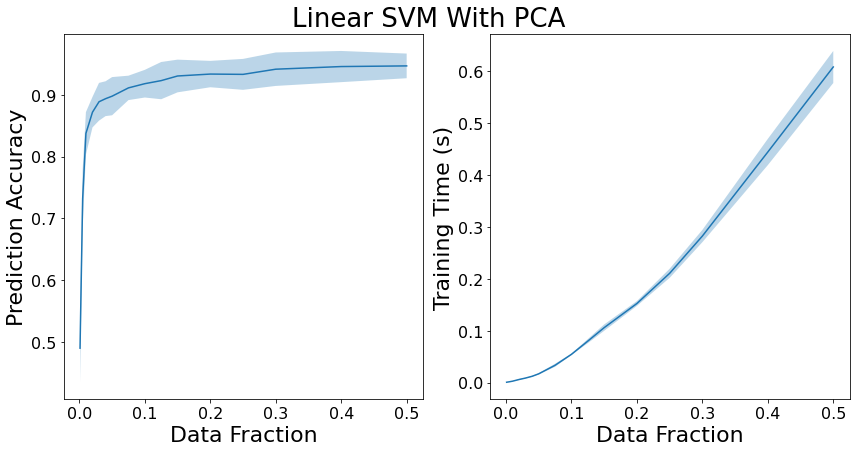

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With PCA", fontsize=26, y=1.04)
ax[0].plot(num_points, mean_svm_sub_acc)
ax[0].fill_between(num_points, mean_svm_sub_acc+std_svm_sub_acc, mean_svm_sub_acc-std_svm_sub_acc, alpha=0.3)
ax[1].plot(num_points, mean_svm_sub_time)
ax[1].fill_between(num_points, mean_svm_sub_time+std_svm_sub_time, mean_svm_sub_time-std_svm_sub_time, alpha=0.3)

ax[0].set_xlabel("Data Fraction", fontsize=22)
ax[0].set_ylabel("Prediction Accuracy", fontsize=22)

ax[1].set_xlabel("Data Fraction", fontsize=22)
ax[1].set_ylabel("Training Time (s)", fontsize=22)

ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.show()

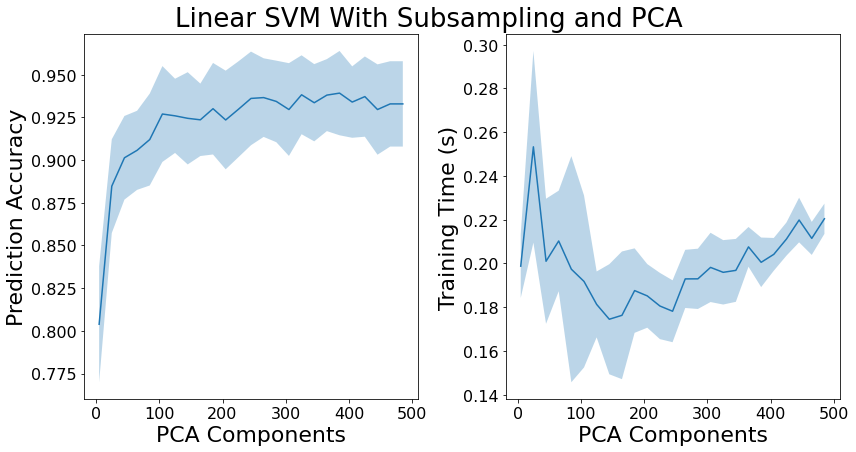

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With Subsampling and PCA", fontsize=26, y=1.04)
ax[0].plot(num_features, mean_svm_sub_pca_acc)
ax[0].fill_between(num_features, mean_svm_sub_pca_acc+std_svm_sub_pca_acc, mean_svm_sub_pca_acc-std_svm_sub_pca_acc, alpha=0.3)
ax[1].plot(num_features, mean_svm_sub_pca_time)
ax[1].fill_between(num_features, mean_svm_sub_pca_time+std_svm_sub_pca_time, mean_svm_sub_pca_time-std_svm_sub_pca_time, alpha=0.3)

ax[0].set_xlabel("PCA Components", fontsize=22)
ax[0].set_ylabel("Prediction Accuracy", fontsize=22)

ax[1].set_xlabel("PCA Components", fontsize=22)
ax[1].set_ylabel("Training Time (s)", fontsize=22)

ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

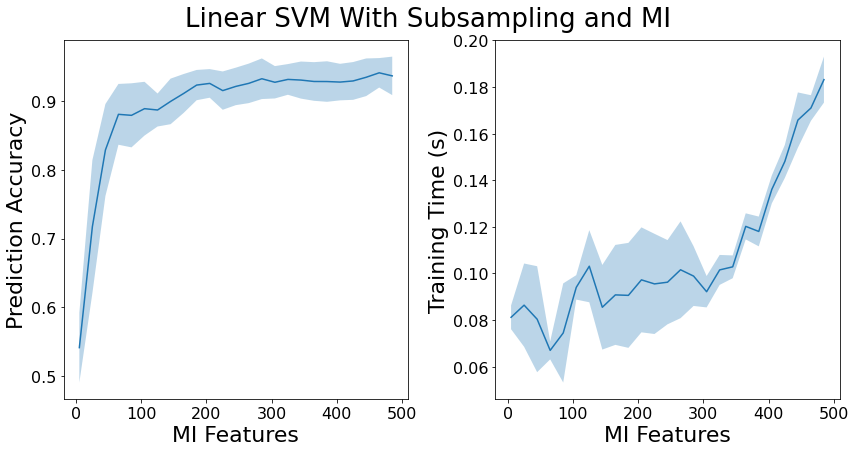

In [59]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle("Linear SVM With Subsampling and MI", fontsize=26, y=1.04)
ax[0].plot(num_features, mean_svm_sub_mi_acc)
ax[0].fill_between(num_features, mean_svm_sub_mi_acc+std_svm_sub_mi_acc, mean_svm_sub_mi_acc-std_svm_sub_mi_acc, alpha=0.3)
ax[1].plot(num_features, mean_svm_sub_mi_time)
ax[1].fill_between(num_features, mean_svm_sub_mi_time+std_svm_sub_mi_time, mean_svm_sub_mi_time-std_svm_sub_mi_time, alpha=0.3)

ax[0].set_xlabel("MI Features", fontsize=22)
ax[0].set_ylabel("Prediction Accuracy", fontsize=22)

ax[1].set_xlabel("MI Features", fontsize=22)
ax[1].set_ylabel("Training Time (s)", fontsize=22)

ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

## Put it all together

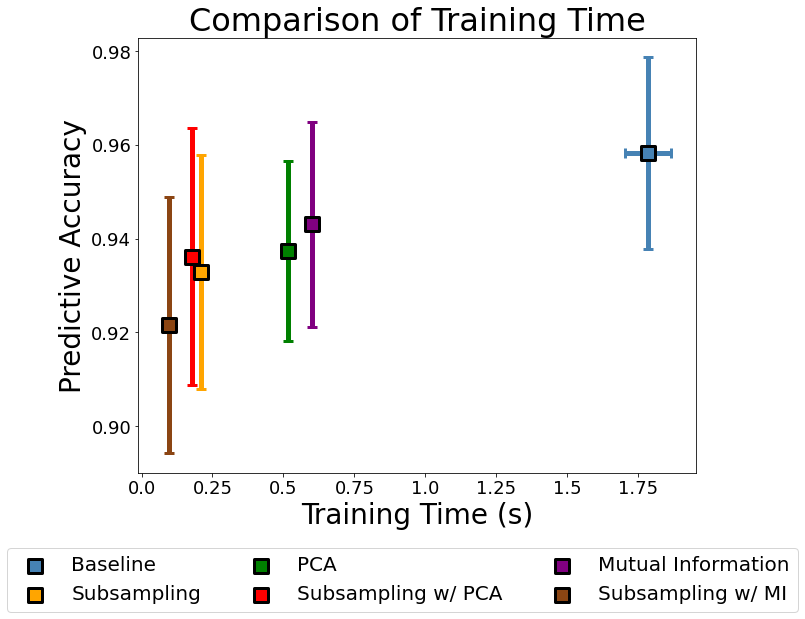

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(mean_lin_time, mean_lin_acc, label="Baseline", s=200, edgecolors='k', linewidth=3, marker='s', color='steelblue')
ax.errorbar(mean_lin_time, mean_lin_acc, xerr=std_lin_time, yerr=std_lin_acc, capsize=5, color='steelblue', lw=5, zorder=0, capthick=3)

ax.scatter(mean_svm_sub_time[best_sub_idx], mean_svm_sub_acc[best_sub_idx], label="Subsampling", s=200, edgecolors='k', linewidth=3, marker='s', color='orange')
ax.errorbar(mean_svm_sub_time[best_sub_idx], mean_svm_sub_acc[best_sub_idx],
            xerr=std_svm_sub_time[best_sub_idx], yerr=std_svm_sub_acc[best_sub_idx], capsize=5, color='orange', lw=5, zorder=0, capthick=3)

ax.scatter(mean_svm_pca_time[best_pca_idx], mean_svm_pca_acc[best_pca_idx], label="PCA", s=200, edgecolors='k', linewidth=3, marker='s', color='green')
ax.errorbar(mean_svm_pca_time[best_pca_idx], mean_svm_pca_acc[best_pca_idx],
            xerr=std_svm_pca_time[best_pca_idx], yerr=std_svm_pca_acc[best_pca_idx], capsize=5, color='green', lw=5, zorder=0, capthick=3)

ax.scatter(mean_svm_sub_pca_time[best_sub_idx], mean_svm_sub_pca_acc[best_sub_idx], label="Subsampling w/ PCA", s=200, edgecolors='k', linewidth=3, marker='s', color='red')
ax.errorbar(mean_svm_sub_pca_time[best_sub_idx], mean_svm_sub_pca_acc[best_sub_idx],
            xerr=std_svm_sub_pca_time[best_sub_idx], yerr=std_svm_sub_pca_acc[best_sub_idx], capsize=5, color='red', lw=5, zorder=0, capthick=3)

ax.scatter(mean_svm_mi_time[best_sub_idx], mean_svm_mi_acc[best_sub_idx], label="Mutual Information", s=200, edgecolors='k', linewidth=3, marker='s', color='purple')
ax.errorbar(mean_svm_mi_time[best_sub_idx], mean_svm_mi_acc[best_sub_idx],
            xerr=std_svm_mi_time[best_sub_idx], yerr=std_svm_mi_acc[best_sub_idx], capsize=5, color='purple', lw=5, zorder=0, capthick=3)

ax.scatter(mean_svm_sub_mi_time[best_sub_idx], mean_svm_sub_mi_acc[best_sub_idx], label="Subsampling w/ MI", s=200, edgecolors='k', linewidth=3, marker='s', color='saddlebrown')
ax.errorbar(mean_svm_sub_mi_time[best_sub_idx], mean_svm_sub_mi_acc[best_sub_idx],
            xerr=std_svm_sub_mi_time[best_sub_idx], yerr=std_svm_sub_mi_acc[best_sub_idx], capsize=5, color='saddlebrown', lw=5, zorder=0, capthick=3)

ax.set_title("Comparison of Training Time", fontsize=32)
ax.set_xlabel("Training Time (s)", fontsize=28)
ax.set_ylabel("Predictive Accuracy", fontsize=28)

ax.set_xticks([i for i in np.arange(0., 1.8, 0.25)])
ax.set_xticklabels([str(i) for i in np.arange(0., 1.8, 0.25)], fontsize=18)

ax.set_yticks([i for i in np.arange(0.9, 1.0, 0.02)])
ax.set_yticklabels(["{0:.2f}".format(i) for i in np.arange(0.9, 1.0, 0.02)], fontsize=18)
ax.legend(bbox_to_anchor=(1.2, -0.15), fontsize=20, ncol=3)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.scatter(mean_lr_time, mean_lr_acc)
ax.errorbar(mean_lr_time, mean_lr_acc, xerr=std_lr_time, yerr=std_lr_acc, capsize=3)

ax.scatter(mean_lin_time, mean_lin_acc)
ax.errorbar(mean_lin_time, mean_lin_acc, xerr=std_lin_time, yerr=std_lin_acc, capsize=3)

ax.scatter(mean_poly_time, mean_poly_acc)
ax.errorbar(mean_poly_time, mean_poly_acc, xerr=std_poly_time, yerr=std_poly_acc, capsize=3)

ax.scatter(mean_nn_time, mean_nn_acc)
ax.errorbar(mean_nn_time, mean_nn_acc, xerr=std_nn_time, yerr=std_nn_acc, capsize=3)

ax.scatter(mean_rf_time, mean_rf_acc)
ax.errorbar(mean_rf_time, mean_rf_acc, xerr=std_rf_time, yerr=std_rf_acc, capsize=3)

plt.show()

## Performance metrics:

In [ ]:
print("SVM with Subsampling and PCA results:")
print(mean_svm_sub_pca_time[best_sub_idx])
print(mean_svm_sub_pca_acc[best_sub_idx]*100)

print("\nSVM baseline results:")
print(mean_lin_time)
print(mean_lin_acc*100)

print("\nSVM PCA:")
print("SPEEDUP FACTOR: {0:.3f}".format(mean_lin_time/mean_svm_pca_time[best_pca_idx]))
print("ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_pca_acc[best_pca_idx])))
print("RELATIVE ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_pca_acc[best_pca_idx])/mean_lin_acc))

print("\nSVM MI:")
print("SPEEDUP FACTOR: {0:.3f}".format(mean_lin_time/mean_svm_mi_time[best_sub_idx]))
print("ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_mi_acc[best_sub_idx])))
print("RELATIVE ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_mi_acc[best_sub_idx])/mean_lin_acc))

print("\nSVM SUBSAMPLING PCA:")
print("SPEEDUP FACTOR: {0:.3f}".format(mean_lin_time/mean_svm_sub_pca_time[best_sub_idx]))
print("ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_sub_pca_acc[best_sub_idx])))
print("RELATIVE ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_sub_pca_acc[best_sub_idx])/mean_lin_acc))

print("\nSVM SUBSAMPLING MI")
print("SPEEDUP FACTOR: {0:.3f}".format(mean_lin_time/mean_svm_sub_mi_time[best_sub_idx]))
print("ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_sub_mi_acc[best_sub_idx])))
print("RELATIVE ACCURACY DIFFERENCE: {0:.3f}%".format(100*(mean_lin_acc - mean_svm_sub_mi_acc[best_sub_idx])/mean_lin_acc))

## Subsampling + SVM/MI Comparison

In [ ]:
mi_speedup = mean_svm_sub_pca_time[best_sub_idx]/mean_svm_sub_mi_time[best_sub_idx]
print("MUTUAL INFORMATION IS {0:.3f}x FASTER THAN PCA".format(mi_speedup))

pca_accuracy_better = mean_svm_sub_pca_acc[best_sub_idx] - mean_svm_sub_mi_acc[best_sub_idx]
print("PCA IS {0:.3f}% MORE ACCURATE THAN MI".format(100*pca_accuracy_better))

In [ ]:
print("Subsampling with Mutual Information trains {0:.2f}x faster than baseline.".format(mean_lin_time/mean_svm_sub_mi_time[best_sub_idx]))
print("Subsampling with PCA trains {0:.2f}x faster than baseline.".format(mean_lin_time/mean_svm_sub_pca_time[best_sub_idx]))

print("\nSubsampling with Mutual Information is {0:.2f}% less accurate than baseline.".format(100*(mean_lin_acc - mean_svm_sub_mi_acc[best_sub_idx])))
print("Subsampling with PCA is {0:.2f}% less accurate than baseline.".format(100*(mean_lin_acc - mean_svm_sub_pca_acc[best_sub_idx])))